In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

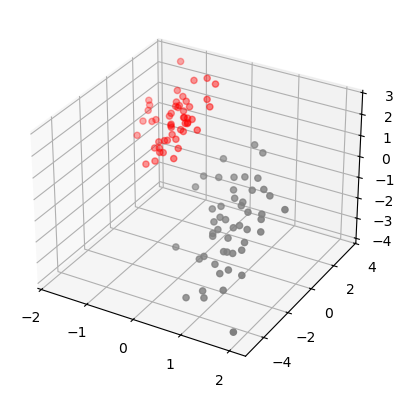

In [2]:
inputs = make_classification(
    n_samples=100,
    n_features=3,
    n_informative=2,
    n_redundant=1,
    n_clusters_per_class=1,
    random_state=8,
)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = inputs[0]
y = inputs[1]
color = ["red" if y_i == 1 else "grey" for y_i in y]
ax.scatter(x[:, 0], x[:, 1], x[:, 2], color=color)
plt.show()

In [3]:
class PCA:
    def __init__(self, num_components):
        self.num_components = num_components
        # mean values of each feature
        self.mean = None
        # principal component weights
        self.components = None
        # proportion of variance explained by principal components
        self.explained_variance = None

    def fit(self, x):
        # data centering
        self.mean = np.mean(x, axis=0)
        x -= self.mean
        # calculate cov matrix and eigenvalues and vectors
        # transposed because the function needs samples as columns
        # transpose eigenvectors so confirm with common POV
        cov_matrix = np.cov(x.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        eigenvectors = eigenvectors.T
        # sort eigenvalues and eigenvectors
        sort_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sort_idx]
        eigenvectors = eigenvectors[sort_idx]

        # store principal components & variance
        self.components = eigenvectors[: self.num_components]
        self.variance_share = np.sum(eigenvalues[: self.num_components]) / np.sum(eigenvalues)

    def transform(self, x):
        # data centering
        x -= self.mean
        return np.dot(x, self.components.T)

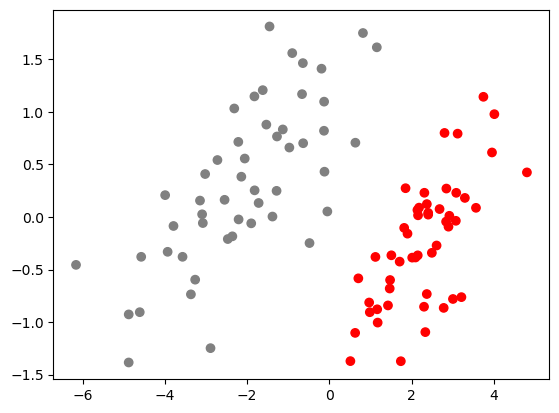

In [4]:
pca = PCA(num_components=2)
pca.fit(x)
x_transformed = pca.transform(x)

plt.scatter(x_transformed[:, 0], x_transformed[:, 1], color=color)
plt.show()

# Explaination

## On what axis is the mean-centering operating at?

In [34]:
np.mean(x, axis=0)

array([-0.0087189 ,  0.09467887,  0.09364051])

In [46]:
(x - np.mean(x, axis=0)).mean(axis=0).round(5)

array([0., 0., 0.])

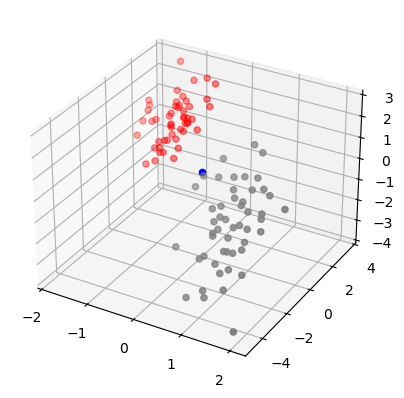

In [53]:
inputs = make_classification(
    n_samples=100,
    n_features=3,
    n_informative=2,
    n_redundant=1,
    n_clusters_per_class=1,
    random_state=8,
)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = inputs[0]
y = inputs[1]
color = ["red" if y_i == 1 else "grey" for y_i in y]

x1 = (x - np.mean(x, axis=0))[:, 0]
x2 = (x - np.mean(x, axis=0))[:, 1]
x3 = (x - np.mean(x, axis=0))[:, 2]

ax.scatter(x1, x2, x3, color=color)
ax.scatter(x1.mean(), x2.mean(), x3.mean(), color="blue")
plt.show()

## What is inputs.T doing?

T is transposing our data.

In [5]:
x.shape

(100, 3)

In [6]:
x.T.shape

(3, 100)

In [7]:
x[:, 0] == x.T[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## What is covariance matrix?

Covariance indicates the level to which two variables vary together.

In [8]:
cov_matrix = np.cov(x.T)
cov_matrix

array([[ 1.26067187, -1.81730627, -1.03548782],
       [-1.81730627,  3.71293034,  2.64407488],
       [-1.03548782,  2.64407488,  2.0631668 ]])

This is it implemented from scratch.

In [9]:
i = x.T[0]  # feature 1
j = x.T[1]  # feature 2


def covariance(i, j):
    """Calculates covariance."""
    i_mean = np.mean(i)
    j_mean = np.mean(j)
    cov = sum((i - i_mean) * (j - j_mean)) / (len(i) - 1)
    return cov


print(f"i j = {covariance(i, j)}")
print(f"j i = {covariance(j, i)}")
print(f"i i = {covariance(i, i)}")
print(f"j j = {covariance(j, j)}")

i j = -1.8173062699776563
j i = -1.8173062699776563
i i = 1.2606718700745958
j j = 3.712930343096273


The covariance of two variables are higher if each have more samples, even if the pair is exactly the same.

In [10]:
i = np.arange(0, 10, 1)
j = i.copy()
covariance(i, j)

9.166666666666666

In [11]:
i = np.arange(0, 100, 1)
j = i.copy()
covariance(i, j)

841.6666666666666

## What is eigenvalues?

**Eigenvectors** are special vectors that, when multiplied by a matrix, give back a scaled version of themselves. The scaling factor is called the **eigenvalue**.

In [12]:
result = np.linalg.eig(cov_matrix)
result

EigResult(eigenvalues=array([ 6.48534268e+00,  5.51426333e-01, -1.34820138e-15]), eigenvectors=array([[-0.37002017,  0.82215629, -0.43260156],
       [ 0.75664392, -0.00348975, -0.65381787],
       [ 0.53905014,  0.56925114,  0.62078828]]))

In [13]:
matrix = [[-3, 1], [-2, 0]]
eigenvector = [[1], [1]]
np.dot(matrix, eigenvector) / eigenvector # eigenvalue = -2

array([[-2.],
       [-2.]])

In [14]:
a = cov_matrix
b = result.eigenvectors[:, 0].reshape(3, 1) # one of three eigenvctors
np.dot(a, b) / b # eigenvalue

array([[6.48534268],
       [6.48534268],
       [6.48534268]])

In our case, eigenvectors point in the direction of the maximum variance and corresponding eigenvalues indicate the importance of its eigenvector.

## What is that sorting?

In [15]:
a = [100, 200, 300]

This sorts in ascending order.

In [16]:
np.argsort(a)

array([0, 1, 2])

This sorts in descending order.

In [17]:
np.argsort(a)[::-1]

array([2, 1, 0])

So it means we are sorthing the eigenvalues and eigenvectors by eigenvalues descending.

## What is the output of `np.linalg.eig()`?

In [18]:
a = [[-6, 3], [4, 5]]
eigenvalues, eigenvectors = np.linalg.eig(a)
eigenvalues_1 = eigenvalues[-1]
eigenvectors_1 = eigenvectors[:, -1]
magnitude = np.sqrt(np.sum(np.multiply(eigenvectors_1, eigenvectors_1)))
print(magnitude)

1.0


The eigenvectors need to be transposed to confirm with our common understanding.

In [19]:
eigenvectors[:, -1] == eigenvectors.T[1]

array([ True,  True])

# Lets walk through the PCA class line by line.

In [20]:
x.shape, y.shape

((100, 3), (100,))

First center the data. We also need to make sure that the data is centered.

In [21]:
means = np.mean(x, axis=0)
x_centered = x - means
means

array([-0.0087189 ,  0.09467887,  0.09364051])

In [22]:
np.round(np.mean(x_centered, axis=0), 5)

array([0., 0., 0.])

Then, calculate covariance matrix. Here we see that, if not transposed, them the covariance will be between samples. We want the covariance to be between features.

In [23]:
np.cov(x_centered).shape

(100, 100)

In [24]:
cov_matrix = np.cov(x_centered.T)
cov_matrix

array([[ 1.26067187, -1.81730627, -1.03548782],
       [-1.81730627,  3.71293034,  2.64407488],
       [-1.03548782,  2.64407488,  2.0631668 ]])

Calculate the eigenv.

In [25]:
eigval, eigvec = np.linalg.eig(cov_matrix)
eigval, eigvec

(array([ 6.48534268e+00,  5.51426333e-01, -1.34820138e-15]),
 array([[-0.37002017,  0.82215629, -0.43260156],
        [ 0.75664392, -0.00348975, -0.65381787],
        [ 0.53905014,  0.56925114,  0.62078828]]))

But, according to numpy documentation:
> The normalized (unit “length”) eigenvectors, such that the column eigenvectors[:,i] is the eigenvector corresponding to the eigenvalue eigenvalues[i].

Therefore we need to change this to conform with our normal POV.

In [26]:
eigvec = eigvec.T
eigvec

array([[-0.37002017,  0.75664392,  0.53905014],
       [ 0.82215629, -0.00348975,  0.56925114],
       [-0.43260156, -0.65381787,  0.62078828]])

Then we sort the eigvec by eigval, descending.

In [27]:
sort_idx = np.argsort(eigval)[::-1]
eigval = eigval[sort_idx]
eigval

array([ 6.48534268e+00,  5.51426333e-01, -1.34820138e-15])

In [28]:
eigvec = eigvec[sort_idx]
eigvec

array([[-0.37002017,  0.75664392,  0.53905014],
       [ 0.82215629, -0.00348975,  0.56925114],
       [-0.43260156, -0.65381787,  0.62078828]])

Then, we get n number of component that we want. In this case we want 2.

In [29]:
components = eigvec[:2]
components

array([[-0.37002017,  0.75664392,  0.53905014],
       [ 0.82215629, -0.00348975,  0.56925114]])

Lastly, we project each samples into these components.

In [30]:
result = np.dot(x_centered, components.T)

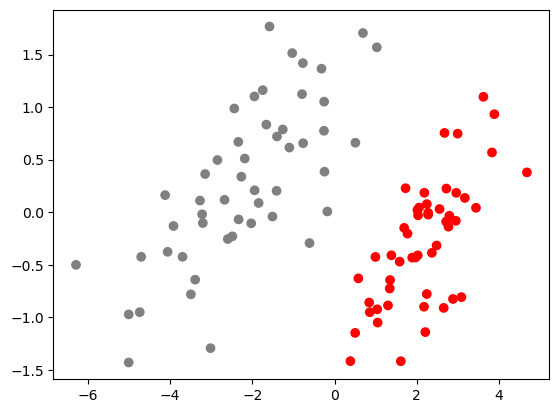

In [31]:
plt.scatter(result[:, 0], result[:, 1], color=color)
plt.show()

# Reference

- [A Beginner's Guide to Eigenvectors, Eigenvalues, PCA, Covariance and Entropy](https://wiki.pathmind.com/eigenvector) by pathmind
- [Eigenvector and Eigenvalue](https://www.mathsisfun.com/algebra/eigenvalue.html) by Math's Fun
- [ How to implement PCA (Principal Component Analysis) from scratch with Python](https://www.youtube.com/watch?v=Rjr62b_h7S4) by AssemblyAI